# Assignment 2: Milestone I Natural Language Processing
## Task 1. Basic Text Pre-processing
#### Student Name: Pallavi Kollipara
#### Student ID: s4015344

Date: 8-05-2024

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy

## Introduction

In Task 1, the primary goal is to prepare the job advertisement dataset for subsequent analysis and modeling tasks. This involves a series of text pre-processing steps to standardize and clean the textual data. Here's a breakdown of the steps involved:

1. Tokenization: The descriptions of each job advertisement are split into individual words or tokens. This process is essential for breaking down the text into its constituent parts, making it easier to analyze and process further.

2. Lowercasing: All words in the job advertisement descriptions are converted to lowercase. This normalization step ensures that words with different capitalizations are treated the same way, preventing redundancy in the vocabulary.

3. Stopword Removal: Common stopwords such as "the", "is", "and", etc., which do not add significant meaning to the text, are removed from the job advertisement descriptions. This helps in reducing noise and improving the efficiency of downstream analysis. here we used stopwords_en.txt file for stopword removal.

4. Filtering Short Words: Words with a length less than 2 are filtered out from the descriptions. This step eliminates very short or irrelevant tokens that may not contribute meaningfully to the analysis.

5. Removing Rare and Frequent Words: Words that appear only once in the entire document collection and the top 50 most frequent words based on document frequency are removed. This helps in reducing noise and focusing on more relevant terms.

6. Vocabulary Creation: Finally, a vocabulary of the cleaned job advertisement descriptions is constructed. This vocabulary contains all unique words present in the dataset after pre-processing, and it serves as a reference for further analysis and modeling tasks.

Overall, Task 1 ensures that the job advertisement data is properly cleaned, standardized, and ready for subsequent analysis, such as feature extraction, classification, or clustering. The pre-processed data and the constructed vocabulary provide a solid foundation for conducting meaningful insights and deriving valuable information from the text data.

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
from sklearn.datasets import load_files  
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter
import os
from nltk.probability import *

### 1.1 Examining and loading data


In the initial step, we embark on examining and loading the dataset containing job advertisements. This phase is crucial as it allows us to gain insights into the structure and contents of the data before proceeding with any preprocessing tasks.

The dataset comprises 776 files, each representing a single job advertisement. These files contain key information such as the title of the job, web index, company name and description of the job. The descriptions are typically rich in detail, outlining the responsibilities, requirements, and qualifications associated with each job position.

Furthermore, the job advertisements are categorized into distinct domains, including Accounting_Finance, Healthcare_Nursing, Engineering, and Sales. This categorization provides a valuable context for understanding the types of job roles and industries represented in the dataset.

During the examination and loading process, we aim to familiarize ourselves with the dataset's structure, understand the distribution of job categories, and ensure that the data is properly formatted and ready for subsequent preprocessing steps. This preparatory phase sets the stage for effective data cleaning and text processing, ultimately facilitating the extraction of meaningful insights and patterns from the job advertisement data.


In [2]:
data = load_files(r"data") 

In [3]:
categories = [path.split('/')[1] for path in data['filenames']]
len(categories)

776

In [6]:
data['target_names']

['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']

In [7]:
job_ads, sentiments = data.data, data.target  

### 1.2 Pre-processing data
***
In the provided code snippet, several preprocessing steps are performed on each job advertisement description to prepare the data for further analysis. Here's an explanation of the preprocessing steps:

1. **Loading Stopwords**: Stopwords are commonly occurring words in a language (e.g., "the", "is", "and") that often carry little to no semantic meaning. These words are removed from the text during preprocessing to focus on more meaningful content. In the code, a set of English stopwords is loaded from a file named "stopwords_en.txt".

2. **Defining Tokenizer**: The `RegexpTokenizer` class from the `nltk.tokenize` module is used to tokenize the text. Tokenization is the process of splitting text into individual words or tokens. The regular expression `r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"` is used to match sequences of alphabetic characters, including hyphenated words.

3. **Initializing Data Structures**: Several data structures are initialized to store processed job advertisements and track the frequency of words in the entire document collection. 
   - `processed_ads`: A list to store dictionaries representing processed job advertisements.
   - `word_freq`: A Counter object to store the frequency of each word in the document collection.

4. **Processing Each Job Advertisement**: The code iterates over each job advertisement, which is represented as a byte string. It extracts various fields such as title, web index, company, and description from the advertisement.

5. **Tokenization and Preprocessing**: 
   - The description of each job advertisement is tokenized using the previously defined tokenizer.
   - Each token is converted to lowercase to ensure uniformity.
   - Words with a length less than 2 and stopwords are removed from the tokenized text.
   
6. **Updating Word Frequency**: The frequency of each word in the preprocessed description is updated in the `word_freq` Counter object.

7. **Storing Processed Advertisement**: The processed job advertisement, along with its metadata (title, category, web index, company), is stored as a dictionary in the `processed_ads` list.

Overall, these preprocessing steps ensure that the job advertisement text is cleaned and standardized, making it suitable for subsequent analysis tasks such as feature extraction and modeling.


In [9]:
# Load stopwords
stop_words = set(stopwords.words('/Users/pallavikollipara/Desktop/rmit/sem2/Advanced Programming for Data Science/Assignment2/rename_me/stopwords_en.txt'))

# Define tokenizer
tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?")

# List to store processed job advertisements
processed_ads = []

# Counter to store the frequency of each word in the entire document collection
word_freq = Counter()

In [10]:
# Process each job advertisement
for job_ad, category in zip(job_ads, categories): 
    # Convert bytes to string and split the advertisement into separate fields
    job_ad_str = job_ad.decode('utf-8')
    fields = job_ad_str.split("\n")

    # Initialize variables to store the separated fields
    title = ""
    webindex = ""
    company = ""
    description = ""

    # Iterate over the fields and assign them to their respective variables
    for field in fields:
        if field.startswith("Title:"):
            title = field.replace("Title:", "").strip()
        elif field.startswith("Webindex:"):
            webindex = field.replace("Webindex:", "").strip()
        elif field.startswith("Company:"):
            company = field.replace("Company:", "").strip()
        elif field.startswith("Description:"):
            description = field.replace("Description:", "").strip()

    # Tokenize description
    tokens = tokenizer.tokenize(description)

    # Convert tokens to lowercase and remove short words and stopwords
    tokens = [token.lower() for token in tokens if len(token) >= 2 and token.lower() not in stop_words]

    # Update word frequency counter
    word_freq.update(tokens)

    # Combine tokens into a single string
    preprocessed_description = " ".join(tokens)

    # Store the processed advertisement as a dictionary
    processed_ad = {
        "Title": title,
        "Category": category,
        "Webindex": webindex,
        "Company": company,
        "Description": preprocessed_description
         
    }

    # Append the processed advertisement to the list
    processed_ads.append(processed_ad)

In [12]:
descriptions = [ad['Description'] for ad in processed_ads]

In [14]:
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from itertools import chain


def tokenize_desc(raw_ads):      
 # segament into sentences
    sentences = sent_tokenize(raw_ads)
    # tokenize each sentence
    pattern = r'''(?x)
    [A-Za-z]+(?:[-'][A-Za-z]+)?        # words with optional internal hyphens and apostrophes
    '''
    tokenizer = RegexpTokenizer(pattern) 
    token_lists = [tokenizer.tokenize(sen) for sen in sentences]
    # merge them into a list of tokens
    tokenised_ads = list(chain.from_iterable(token_lists))
    return tokenised_ads

In [15]:
import numpy as np
def stats_print(tk_ads):
    words = list(chain.from_iterable(tk_ads)) # we put all the tokens in the corpus in a single list
    vocab = set(words) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of reviews:", len(tk_ads))
    lens = [len(article) for article in tk_ads]
    print("Average review length:", np.mean(lens))
    print("Maximun review length:", np.max(lens))
    print("Minimun review length:", np.min(lens))
    print("Standard deviation of review length:", np.std(lens))

In [16]:
tk_ads = [tokenize_desc(r.lower()) for r in descriptions]  # list comprehension, generate a list of tokenized articles

In [17]:
stats_print(tk_ads)

Vocabulary size:  9404
Total number of tokens:  107146
Lexical diversity:  0.08776809213596401
Total number of reviews: 776
Average review length: 138.07474226804123
Maximun review length: 487
Minimun review length: 12
Standard deviation of review length: 73.08267159744621


In [18]:
words = list(chain.from_iterable(tk_ads)) # we put all the tokens in the corpus in a single list


In [19]:
term_fd = FreqDist(words) # compute term frequency for each unique word/type

In [20]:
term_fd.most_common(50)

[('experience', 1276),
 ('sales', 1030),
 ('role', 946),
 ('work', 861),
 ('business', 832),
 ('team', 789),
 ('working', 719),
 ('job', 688),
 ('care', 675),
 ('skills', 669),
 ('company', 614),
 ('client', 594),
 ('management', 572),
 ('manager', 519),
 ('support', 501),
 ('uk', 496),
 ('service', 481),
 ('excellent', 455),
 ('development', 431),
 ('required', 399),
 ('based', 376),
 ('opportunity', 372),
 ('services', 369),
 ('knowledge', 349),
 ('apply', 349),
 ('successful', 340),
 ('training', 338),
 ('design', 337),
 ('engineering', 336),
 ('customer', 335),
 ('recruitment', 335),
 ('salary', 322),
 ('candidate', 319),
 ('clients', 310),
 ('high', 309),
 ('join', 302),
 ('ability', 301),
 ('strong', 299),
 ('provide', 298),
 ('home', 291),
 ('ensure', 290),
 ('leading', 289),
 ('including', 287),
 ('engineer', 285),
 ('financial', 279),
 ('good', 274),
 ('staff', 271),
 ('position', 268),
 ('systems', 267),
 ('full', 263)]

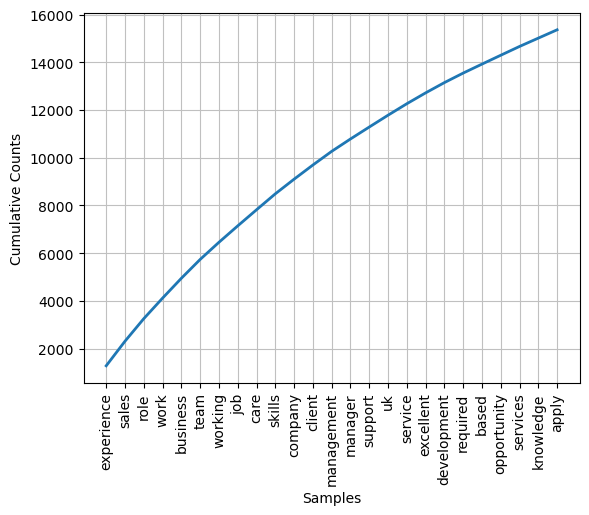

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [21]:
term_fd.plot(25, cumulative=True)

In [22]:
# Remove words that appear only once in the document collection
unique_words = set(word for word, freq in word_freq.items() if freq == 1)

In [23]:
# Remove the top 50 most frequent words based on document frequency
top_50_words = [word for word, _ in word_freq.most_common(50)]

In [24]:
# Update processed descriptions to remove unique and top 50 words
for ad in processed_ads:
    tokens = ad['Description'].split()
    tokens = [token for token in tokens if token not in unique_words and token not in top_50_words]
    ad['Description'] = " ".join(tokens)

In [25]:
# Save processed job advertisements to a file
output_file = "processed_job_ads.txt"
with open(output_file, "w") as file:
    for ad in processed_ads:
        file.write(f"Title: {ad['Title']}\n")
        file.write(f"Category: {ad['Category']}\n")
        file.write(f"Webindex: {ad['Webindex']}\n")
        file.write(f"Company: {ad['Company']}\n")
        file.write(f"Description: {ad['Description']}\n\n")


In [26]:
descriptions = [ad['Description'] for ad in processed_ads]

In [27]:
tk_ads = [tokenize_desc(r.lower()) for r in descriptions]  # list comprehension, generate a list of tokenized articles

In [28]:
stats_print(tk_ads)

Vocabulary size:  5168
Total number of tokens:  80053
Lexical diversity:  0.0645572308345721
Total number of reviews: 776
Average review length: 103.1610824742268
Maximun review length: 390
Minimun review length: 7
Standard deviation of review length: 56.700979835379975


## Saving required outputs

- vocab.txt

In [29]:
vocabulary = sorted(set([ads for sublist in tk_ads for ads in sublist]))


In [30]:
# Save vocabulary to a txt file
vocab_path = "vocab.txt"
with open(vocab_path, 'w') as file:
    for index, word in enumerate(vocabulary):
        file.write(f"{word}:{index}\n")

## Summary

The whole process involves basic text pre-processing of a dataset containing job advertisements. Here's a summary of the steps involved:

1. **Loading Data**: Examining and loading the job advertisement data, which comprises 776 files categorized into Accounting_Finance, Healthcare_Nursing, Engineering, and Sales.

2. **Pre-processing Data**:
   - Tokenization of job advertisement descriptions using a regular expression pattern.
   - Conversion of tokens to lowercase.
   - Removal of stopwords, short words (length less than 2), and words that appear only once in the document collection.
   - Extraction of relevant information such as title, web index, company, and description from each advertisement.
   - Counting the frequency of each word in the entire document collection.

3. **Vocabulary Creation**:
   - Generating a vocabulary from the preprocessed job advertisement descriptions.
   - Saving the vocabulary to a text file in alphabetical order, with each word paired with its corresponding index.

The output of Task 1 includes the preprocessed job advertisements along with the vocabulary file, which serves as a reference for encoding words into numeric indices for further analysis and modeling.